In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Klassen import Welle

# Allgemeine Berechnung für die Biegelinie

Vereinfachungen und Randbedingungen:
- z beginnt immer im Festlager und geht bis zum Loslager
- Welleninformationen können über Klasse Welle abgerufen werden (Durchmesser, Kräfte, etc)
- Alle Längen in $mm$
- Belastungen in Welle.belastungen sind nach z sortiert

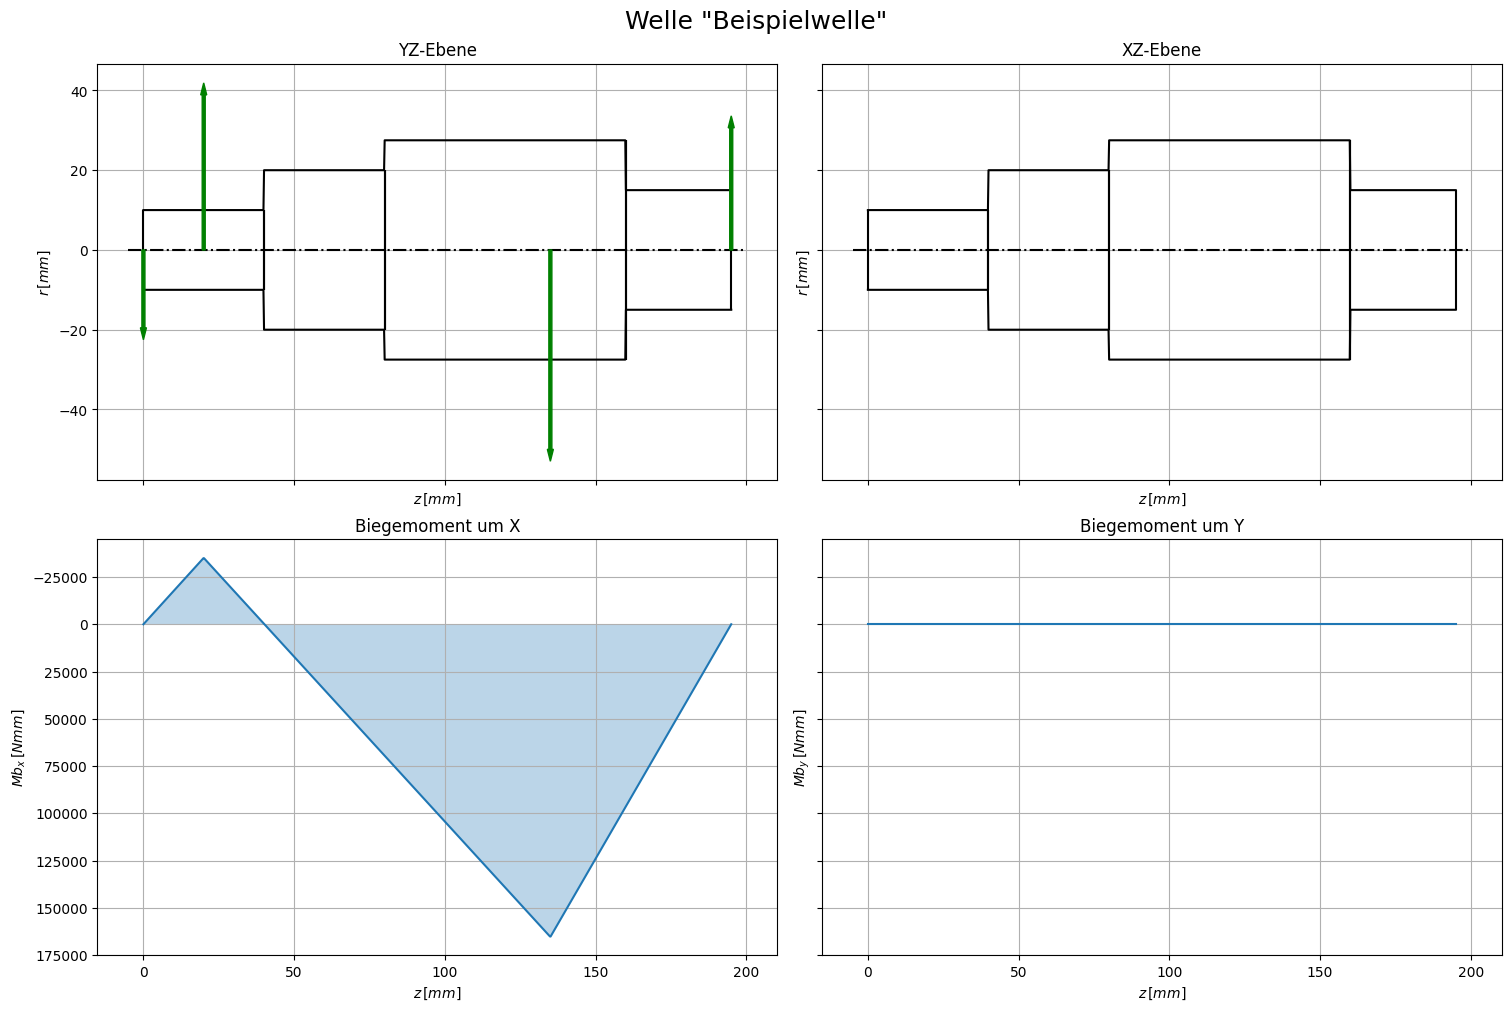

In [4]:
welle = Welle("Beispielwelle",195)
welle.set_geometrie(
    (
        (0,10),
        (40,10),
        (40,20),
        (80,20),
        (80,27.5),
        (160,27.5),
        (160,15),
        (195,15),
    )
)
welle.set_Kraft(-3500,"r",20,0,0)
welle.set_Kraft(4500,"r",135,0,0)
welle.lagerkräfte_berechnen()
welle.plot()